In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Customer Purchasing Behaviors.csv to Customer Purchasing Behaviors.csv


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
data=pd.read_csv('Customer Purchasing Behaviors.csv')
data.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


univariate analysis

In [ ]:
d=data.copy(deep=True)
d.isnull().sum()

,0
user_id,0
age,0
annual_income,0
purchase_amount,0
loyalty_score,0
region,0
purchase_frequency,0


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB


In [ ]:
d.drop(columns=['user_id'],inplace=False).describe()

,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
count,238.000000,238.000000,238.000000,238.000000,238.000000
mean,38.676471,57407.563025,425.630252,6.794118,19.798319
std,9.351118,11403.875717,140.052062,1.899047,4.562884
min,22.000000,30000.000000,150.000000,3.000000,10.000000
25%,31.000000,50000.000000,320.000000,5.500000,17.000000
50%,39.000000,59000.000000,440.000000,7.000000,20.000000
75%,46.750000,66750.000000,527.500000,8.275000,23.000000
max,55.000000,75000.000000,640.000000,9.500000,28.000000


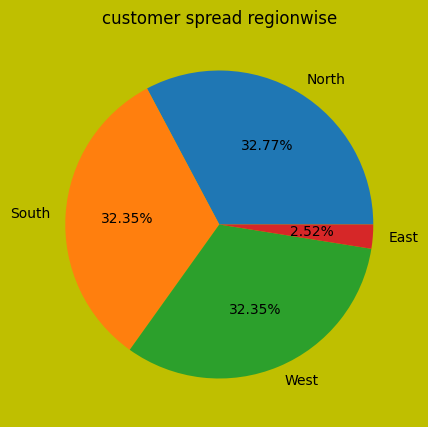

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5),facecolor='y')
plt.pie(x=d['region'].value_counts(),labels=d['region'].unique(),autopct='%.2f%%')
plt.title('customer spread regionwise')
plt.show()

<ipython-input-18-9e05e5bec7e8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['annual_income'],kde=True)


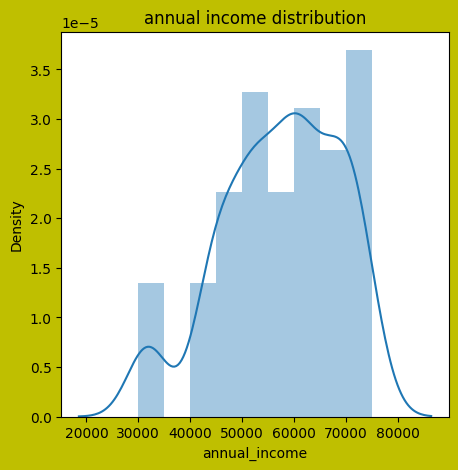

In [ ]:
plt.figure(figsize=(5,5),facecolor='y')
sns.distplot(d['annual_income'],kde=True)
plt.title('annual income distribution')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


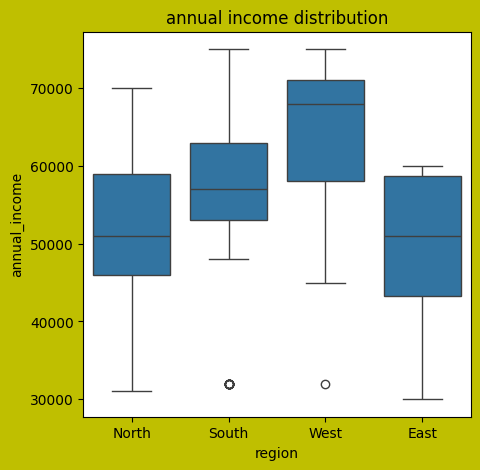

In [ ]:
plt.figure(figsize=(5,5),facecolor='y')
sns.boxplot(x='region',y='annual_income',data=d)
plt.title('annual income distribution')
plt.show()

bivariate analysis

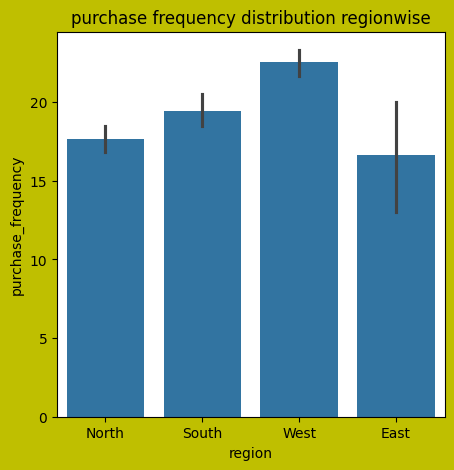

In [ ]:
plt.figure(figsize=(5,5),facecolor='y')
sns.barplot(x='region',y='purchase_frequency',data=d)
plt.title('purchase frequency distribution regionwise')
plt.show()

<Figure size 500x500 with 0 Axes>

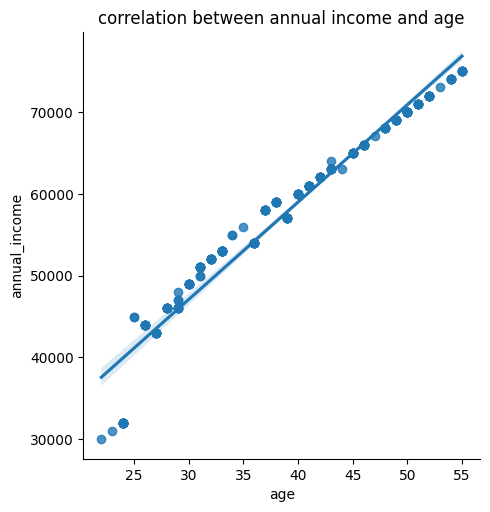

In [ ]:
plt.figure(figsize=(5,5),facecolor='w')
sns.lmplot(x='age',y='annual_income',data=d,fit_reg=True)
plt.title('correlation between annual income and age')
plt.show()

In [ ]:
np.corrcoef(d['age'],d['annual_income'])

array([[1.        , 0.97483295],
       [0.97483295, 1.        ]])

In [ ]:
d[['age','annual_income','purchase_amount','loyalty_score','purchase_frequency']].corr()

,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
age,1.000000,0.974833,0.986140,0.981835,0.980532
annual_income,0.974833,1.000000,0.984208,0.984351,0.982920
purchase_amount,0.986140,0.984208,1.000000,0.994147,0.993579
loyalty_score,0.981835,0.984351,0.994147,1.000000,0.986990
purchase_frequency,0.980532,0.982920,0.993579,0.986990,1.000000


In [ ]:
d['annual_income'].describe()

,annual_income
count,238.000000
mean,57407.563025
std,11403.875717
min,30000.000000
25%,50000.000000
50%,59000.000000
75%,66750.000000
max,75000.000000


In [ ]:
def categorise_income(v):
  if v<50000:
    return 'low'
  elif v<60000:
    return 'medium'
  else:
    return 'high'
d['income_category']=d['annual_income'].apply(categorise_income)
d.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency,income_category
0,1,25,45000,200,4.5,North,12,low
1,2,34,55000,350,7.0,South,18,medium
2,3,45,65000,500,8.0,West,22,high
3,4,22,30000,150,3.0,East,10,low
4,5,29,47000,220,4.8,North,13,low


In [ ]:
c=pd.crosstab(d['income_category'],d['region'],normalize=True,margins=True)
c

region,East,North,South,West,All
income_category,,,,,
high,0.004202,0.075630,0.155462,0.239496,0.474790
low,0.012605,0.155462,0.063025,0.016807,0.247899
medium,0.008403,0.096639,0.105042,0.067227,0.277311
All,0.025210,0.327731,0.323529,0.323529,1.000000


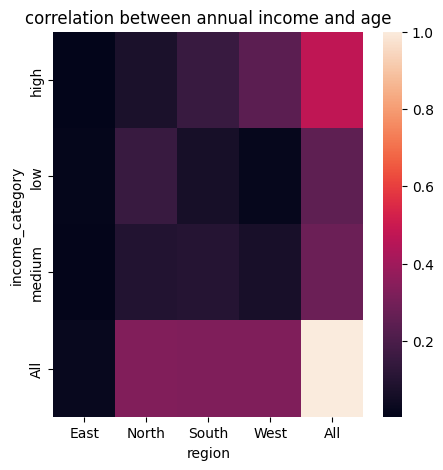

In [ ]:
plt.figure(figsize=(5,5),facecolor='w')
sns.heatmap(c)
plt.title('correlation between annual income and age')
plt.show()

**Conclusion**
1. Customer Distribution: The majority of customers are concentrated in north,south and west regions, as can be seen in the pie chart. Thus, marketing (opening up new shopping marts, advertising etc.) should be focused more in these areas.
2. Annual Income Distribution: The distribution of annual income is slightly skewed towards the lower end, as can be seen in the histogram and boxplot.

3. Purchase Frequency and Region: There is a relationship between purchase frequency and region. South and West regions exhibit higher purchase frequencies than others, as observed from the barplot.

4. Age and Income Correlation: There is a strong positive correlation between age and annual income, as can be seen in the scatter plot and correlation coefficient. as age increases, the income also generally increases. different marketing strategies should be employed for different age groups who have different income levels.